In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as optim
import warnings
warnings.filterwarnings('ignore')

In [81]:
# test1 = pd.read_excel('./CellSage-based analyses (selected XCEL cells) (003) (version 1).xlsx')
test = pd.read_csv('./cells1.csv')

In [82]:
# test1 = test1.iloc[:14,13:15]
# test1.columns = test1.loc[1]
# test1 = test1.loc[2:]
# test1.reset_index(drop=True,inplace=True)

In [83]:
# capacity1 = test1['Capacity loss, %']
# cycles1 = test1['Cycles']

In [124]:
def sre(abm,cycles):
    a = abs(abm[0])
    b = abm[1]
    m = abm[2]
    return (2*m)*((0.5)-(1/(1+np.exp((a*cycles)**b))))

In [125]:
def sre_fit(parm,capacity,cycles):
    try:
        pred_val = sre(parm,cycles)
    except:
        pred_val = [sre(parm,i) for i in cycles]
    result = np.sqrt(np.mean((capacity-pred_val)**2))
    return result

In [145]:
def sre_optimize(dataset,cellnumber):
    capacity = test['capacity'][test['cell']==cellnumber]
    capacity = capacity.reset_index(drop=True)
    cycles = test['cycles'][test['cell']==cellnumber]
    cycles = cycles.reset_index(drop=True)
    
    parm = np.c_[0.2,0.3,max(capacity)][0]
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,3,1)
    plt.plot(cycles,capacity)
    plt.title("Before Model")
    
    plt.subplot(1,3,2)
    plt.plot(sre(parm,cycles))
    plt.title("Sre with parameters")
    
    plt.subplot(1,3,3)
    fit = optim.minimize(fun=sre_fit,x0=parm,args=(capacity,cycles),method='L-BFGS-B')
    plt.scatter(x=range(len(capacity)),y = capacity)
    plt.plot(sre(fit.x,cycles),'r')
    plt.title("After model")
    plt.show()
    return fit.x

Cell Number =  4


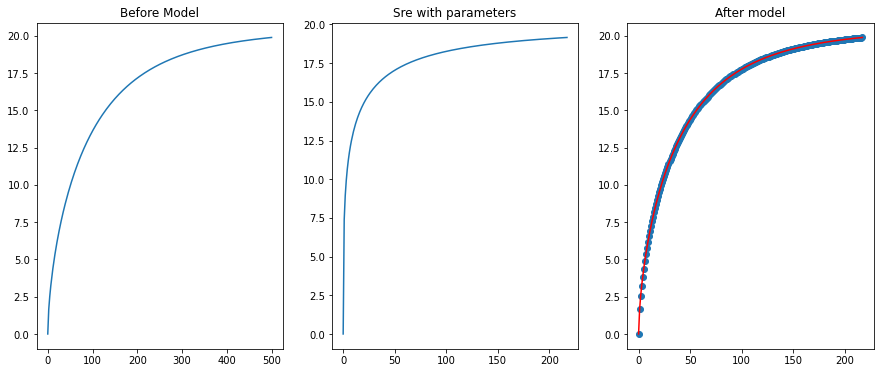

a =  0.021917069192470447 
b =  0.6000000465538723 
m =  20.487844749150742
Cell Number =  5


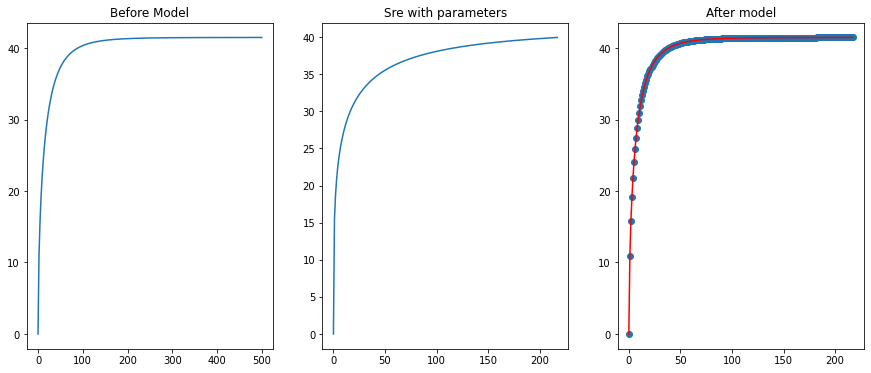

a =  0.14717709734140555 
b =  0.5401273053097393 
m =  41.47926321038889
Cell Number =  6


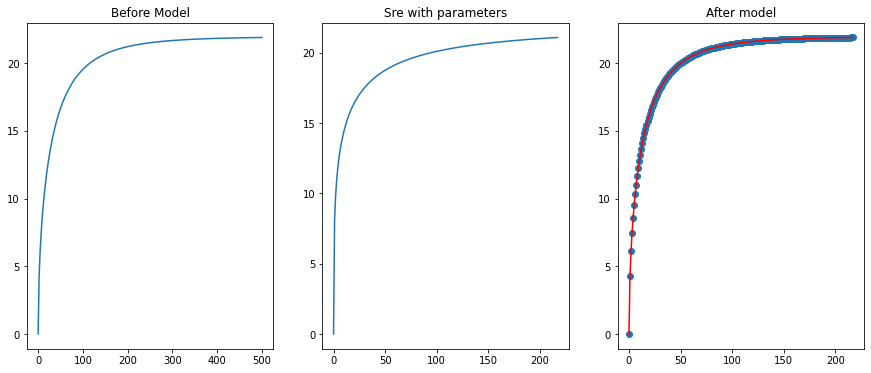

a =  0.07577251639977069 
b =  0.5160532929817755 
m =  21.968196864810242
Cell Number =  16


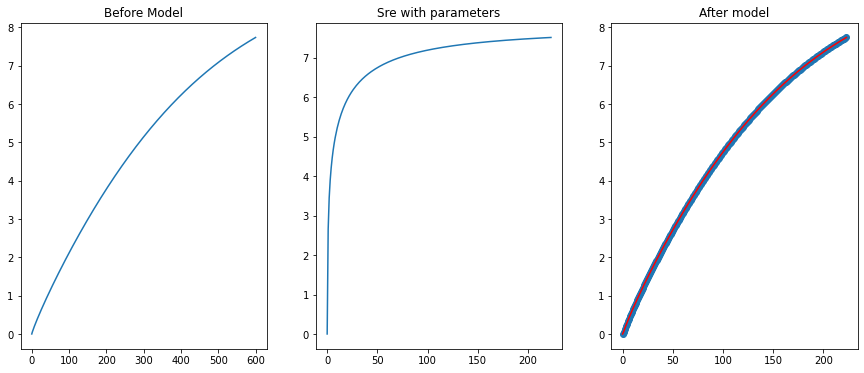

a =  0.004047727953940656 
b =  0.8928600549659368 
m =  9.649862182996197


In [149]:
for i in test.cell.unique():
    print("Cell Number = ",i)
    print("="*30)
    output_params = sre_optimize(dataset=test,cellnumber=i)
    print("a = ",output_params[0],"\nb = ",output_params[1],"\nm = ",output_params[2])
    print("="*30)

In [84]:
capacity = test['capacity'][test['cell']==4]
capacity = capacity.reset_index(drop=True)
cycles = test['cycles'][test['cell']==4]
cycles = cycles.reset_index(drop=True)

In [122]:
# plt.plot(cycles1,capacity1)
# plt.show()

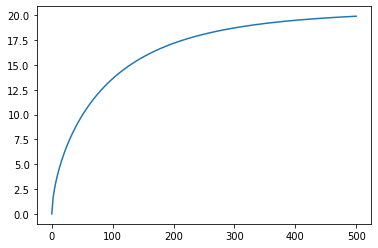

In [123]:
plt.plot(cycles,capacity)
plt.show()

In [126]:
parm = np.c_[0.2,0.3,max(capacity)][0]

In [127]:
sre(parm,cycles)

0       0.000000
1       7.387906
2       8.940585
3       9.927077
4      10.657506
         ...    
213    19.141143
214    19.145201
215    19.149225
216    19.153214
217    19.157170
Name: cycles, Length: 218, dtype: float64

In [106]:
# sre_c1 = []
# for i in cycles1:
#     sre_c1.append(sre(parm,i))

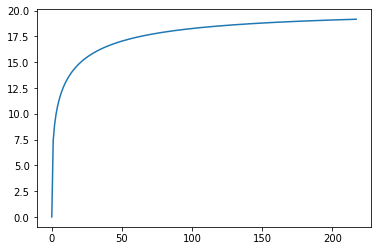

In [128]:
plt.plot(sre(parm,cycles))
plt.show()

In [129]:
# plt.plot(sre_c1)
# plt.show()

In [130]:
fit = optim.minimize(fun=sre_fit,x0=parm,args=(capacity,cycles),method='L-BFGS-B')

In [131]:
fit

      fun: 1.4964324584318091e-06
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.19842975, -0.56492814, -0.08663836])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 352
      nit: 45
     njev: 88
   status: 0
  success: True
        x: array([ 0.02191707,  0.60000005, 20.48784475])

In [133]:
# plt.scatter(x=range(len(capacity1)),y = capacity1)
# plt.plot([sre(fit.x,i) for i in cycles1],'r')

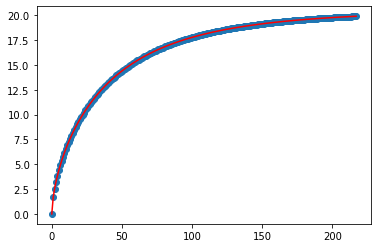

In [134]:
plt.scatter(x=range(len(capacity)),y = capacity)
plt.plot(sre(fit.x,cycles),'r')